# Acoustic Waves in an Organ Pipe

## Austin Castelo

### Air Pressure equation p(x,t)

Governed by 
$$\frac{\partial^2 p}{\partial t^2} = c^2 \frac{\partial^2 p}{\partial x^2}\;\; for\;\; 0<x<l,\;\; t>0$$

$l$ is the length of the pipe and $c$ is a constant

### Boundary Conditions

#### Open Pipe

$$p(0,t)=p_0$$  $$p(l,t)=p_0$$

#### Closed Pipe at $x=l$

$$p(0,t)=p_0$$ $$\frac{\partial p}{\partial t}(l,t)=0$$

### Initial Conditions

Assume $c=1$ and $l=1$

$$p(x,0)=p_0cos2\pi x, \;\; \;\; and \;\;\;\; \frac{\partial p}{\partial t}(x,0)=0 \;\;\;\; 0\leq x\leq 1$$

### Finite Difference Method Approximation

$$\frac{\partial^2 p}{\partial t^2} \approx \frac{p^{n+1}_{j}-2p^{n}_{j}+p^{n-1}_{j}}{k^2}$$

$$\frac{\partial^2 p}{\partial x^2} \approx \frac{p^{n}_{j+1}-2p^{n}_{j}+p^{n}_{j-1}}{h^2}$$

$$\frac{\partial^2 p}{\partial t^2}-c^2 \frac{\partial^2 p}{\partial x^2}\approx \frac{p^{n+1}_{j}-2p^{n}_{j}+p^{n-1}_{j}}{k^2} -c^2\frac{p^{n}_{j+1}-2p^{n}_{j}+p^{n}_{j-1}}{h^2}=0$$

$$p^{n+1}_{j} = \alpha^2p^{n}_{j+1}+\alpha^2p^{n}_{j-1}-p^{n-1}_{j}+2(1-\alpha^2)p^{n}_{j} \;\;\;\; \alpha = \frac{ck}{h}$$

### Stability Condition using Von Neumann Analysis

$p^{n}_{j}=g^ne^{imjh}$

$$\frac{g^{n+1}e^{imjh}-2g^{n}e^{imjh}+g^{n-1}e^{imjh}}{k^2}-c^2\frac{g^{n}e^{im(j+1)h}-2g^{n}e^{imjh}+g^{n}e^{im(j-1)h}}{h^2}=0$$

$$g^{n}e^{imjh}[\frac{g-2+\frac{1}{g}}{k^2}-c^2\frac{e^{imh}-2+e^{-imh}}{h^2}]=0$$

$$g-2+\frac{1}{g}=\alpha^2(e^{imh}-2+e^{-imh)}) \;\;\;\;\; \alpha = \frac{ck}{h}$$

$$g-2+\frac{1}{g}=-2\alpha^2(1-cosmh)$$

$$g-2+\frac{1}{g}=-4\alpha^2(sin^2\frac{mh}{2})$$

$$(\sqrt{g}-\frac{1}{\sqrt{g}})^{2}=(\pm 2i\alpha \; sin\frac{mh}{2})^2$$

$$\sqrt{g}-\frac{1}{\sqrt{g}}=\pm 2i\alpha \; sin\frac{mh}{2}$$

$$g \pm 2i\alpha sin\frac{mh}{2}\sqrt{g}-1=0$$

$$\iff g^{1/2}_{\pm}= \pm i\alpha sin\frac{mh}{2} \pm \sqrt{1-\alpha^2sin\frac{mh}{2}}$$

$$\iff g_{\pm}= (\pm i\alpha sin\frac{mh}{2} \pm \sqrt{1-\alpha^2sin\frac{mh}{2}}\;\;)^2$$

$$|g_{\pm}| \leq 1 \iff |\alpha| \leq 1$$

### Stability Condition

$$|\alpha| = |c|\frac{k}{h} \leq 1$$

### Order of the Method

$p^{n+1}_{j} = p^{n}_{j}+kp_t+\frac{1}{2}k^2p_{tt}+\frac{1}{6}k^3p_{ttt}+O(k^4)$

$p^{n-1}_{j} = p^{n}_{j}-kp_t+\frac{1}{2}k^2p_{tt}-\frac{1}{6}k^3p_{ttt}+O(k^4)$

$p^{n}_{j+1} = p^{n}_{j}+hp_x+\frac{1}{2}h^2p_{xx}+\frac{1}{6}h^3p_{xxx}+O(h^4)$

$p^{n}_{j-1} = p^{n}_{j}-hp_x+\frac{1}{2}h^2p_{xx}-\frac{1}{6}h^3p_{xxx}+O(h^4)$

$$p_{tt} - \frac{p^{n+1}_{j}-2p^{n}_{j}+p^{n-1}_{j}}{k^2} = c^2[p_{xx} - \frac{p^{n}_{j+1}-2p^{n}_{j}+p^{n}_{j-1}}{h^2}]$$

$$p_{tt} - \frac{2(k^2p_{tt}+O(k^4))}{k^2} = c^2[p_{xx}-\frac{2(h^2p_{xx}+O(h^4))}{h^2}]$$

$$-O(k^2)= O(h^2) \rightarrow O(h^2)+O(k^2)$$

The method is second order in k and h

### Considerations of Method

This FD method is a two-step method, meaning we need to initialize $p^1$ before implementing the method.

Since we are given $\frac{\partial p}{\partial t}(x,0)=0$ as an initial condition we can initialize $p^{1}_{j}$ as $p^{1}_{j}=p^{0}_{j}+0k$

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [419]:
def FD_wave(p0, k, h, T, closed):
    x = np.arange(0,1+h,h)
    t = np.arange(0,T+k,k)
    
    M = len(t)
    N = len(x)
    alpha = (k/h)**2
    print(alpha)
    
    
    p0 = np.array([p0*np.cos(2*np.pi*x)])
    p = np.repeat(p0, M, axis=0)
    
    
    for n in range(1,M-1):
        for j in range(1,N-1):
            p[n+1,j] = alpha*p[n,j-1] + alpha*p[n,j+1] + 2*(1-alpha)*p[n,j] - p[n-1,j] 
        if closed:
            p[n+1][-1] = 2*p[n][-1] - p[n-1][-1] + 2*alpha*(p[n][-2] - p[n][-1])
    
    return p

In [420]:
p = FD_wave(0.9,0.05,0.05,1,False)

1.0


In [421]:
def graph(p, t, k, h):
    x = np.arange(0,1+h,h)
    t1=0
    if t != 0:
        t1 = int(t/k)
        
    
    plt.figure(figsize=(13,8) , facecolor= 'w')
    plt.plot(x, p[t1], color = 'b', linewidth = 2)
    plt.grid(linewidth = 2)
    plt.title('Acoustic wave at t=' + str(t))
    plt.xlabel('X')
    plt.ylabel('Air Pressure')
    plt.show()

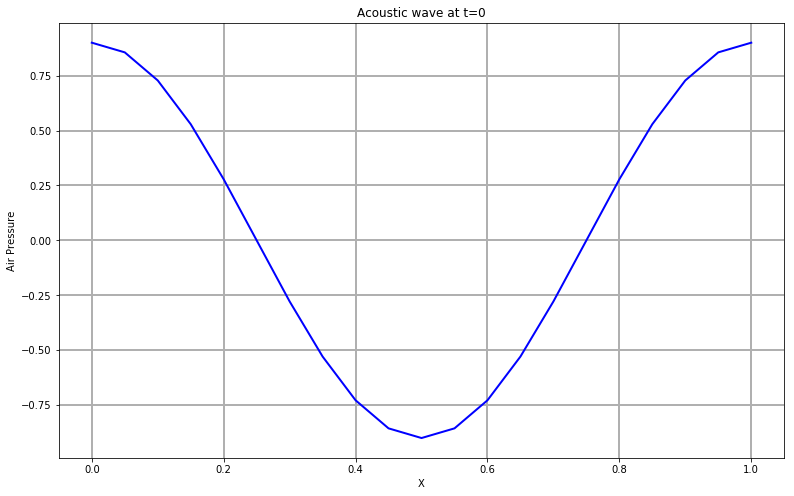

In [422]:
graph(p, 0, 0.05, 0.05)

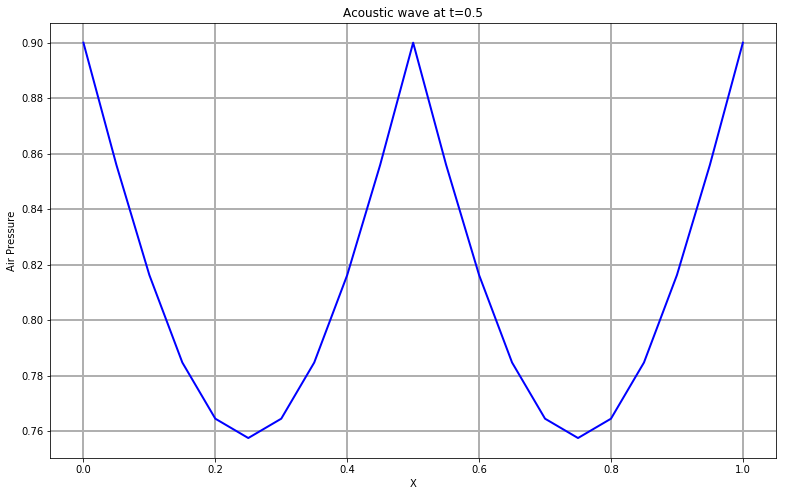

In [423]:
graph(p,0.5,0.05, 0.05)

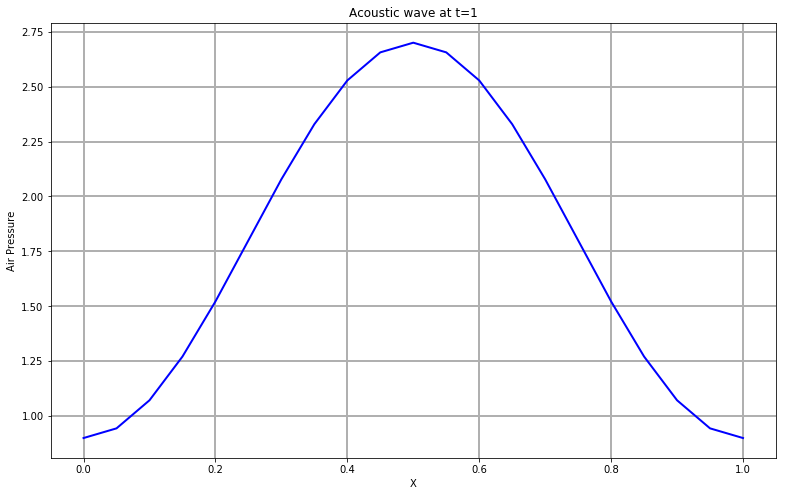

In [424]:
graph(p,1,0.05, 0.05)

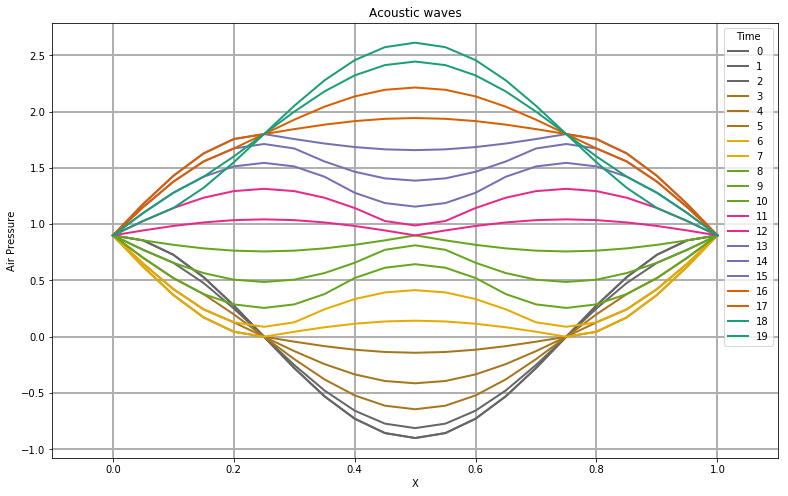

In [425]:
plt.figure(figsize=(13,8) , facecolor= 'w')
x = np.arange(0,1+0.05,0.05)
color=iter(cm.Dark2(np.linspace(1,0,len(p))))
for i in range(0,20):
    c = next(color)
    plt.plot(x, p[i], color = c, linewidth = 2)
plt.grid(linewidth = 2)
plt.legend(labels = range(0,20), title = 'Time', loc=1)
plt.title('Acoustic waves')
plt.xlabel('X')
plt.ylabel('Air Pressure')
plt.xlim(-.1,1.1)
plt.show()

In [426]:
p2 = FD_wave(0.9, 0.05, 0.05, 1, True)

1.0


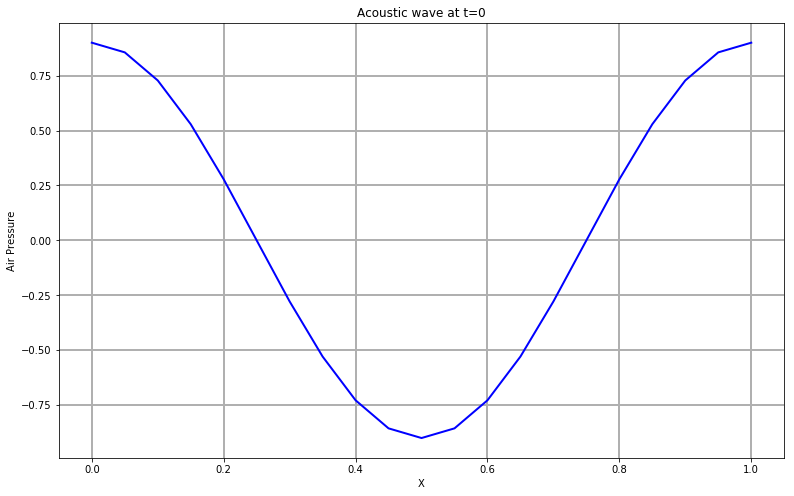

In [427]:
graph(p2, 0, 0.05, 0.05)

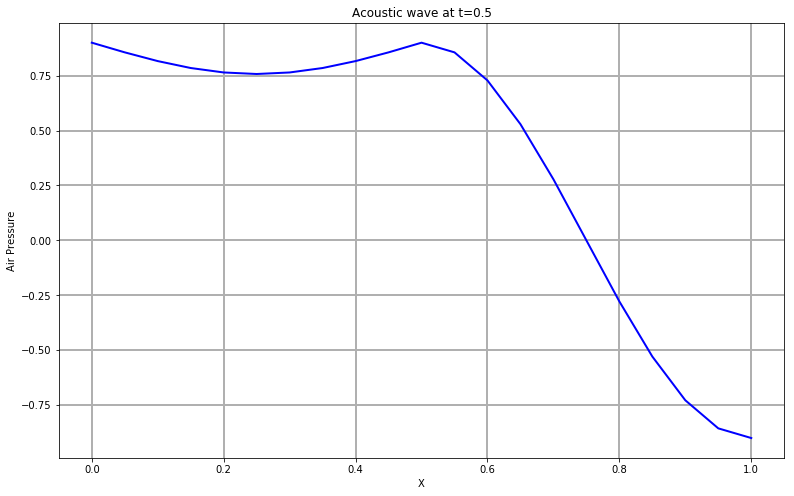

In [428]:
graph(p2, 0.5, 0.05, 0.05)

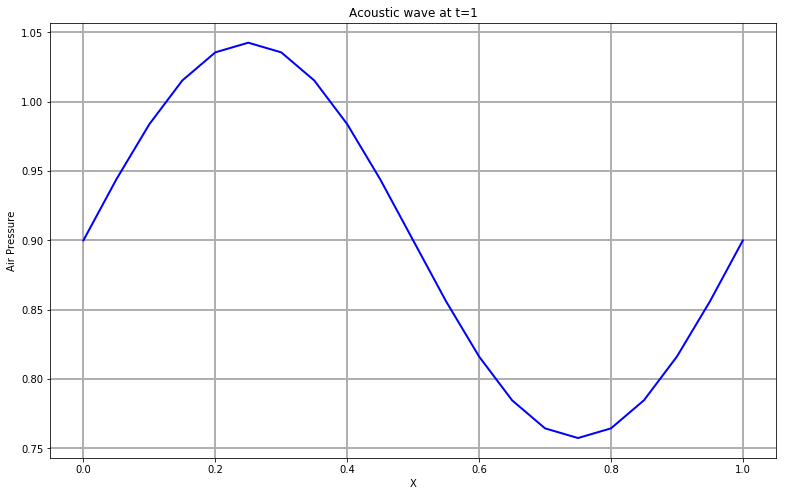

In [429]:
graph(p2, 1, 0.05, 0.05)

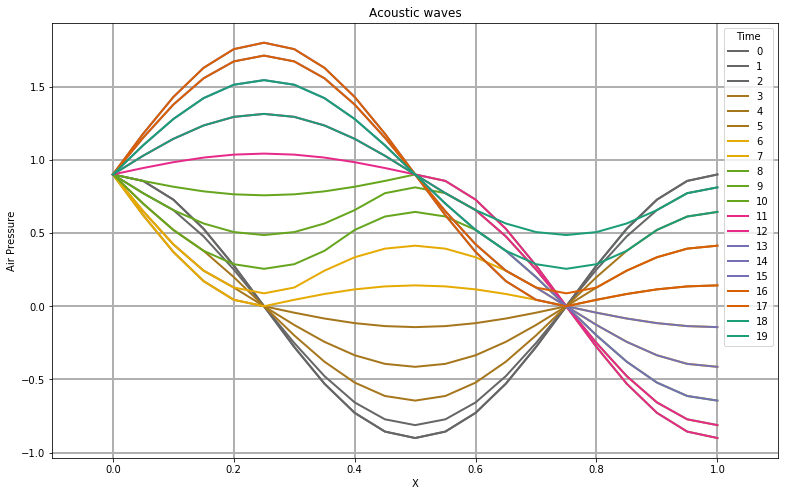

In [430]:
plt.figure(figsize=(13,8) , facecolor= 'w')
x = np.arange(0,1+0.05,0.05)
color=iter(cm.Dark2(np.linspace(1,0,len(p2))))
for i in range(0,20):
    c = next(color)
    plt.plot(x, p2[i], color = c, linewidth = 2)
plt.grid(linewidth = 2)
plt.legend(labels = range(0,20), title = 'Time', loc=1)
plt.title('Acoustic waves')
plt.xlabel('X')
plt.ylabel('Air Pressure')
plt.xlim(-.1,1.1)
plt.show()

In [431]:
p3 = FD_wave(0.9, 0.025, 0.025, 1, False)

1.0


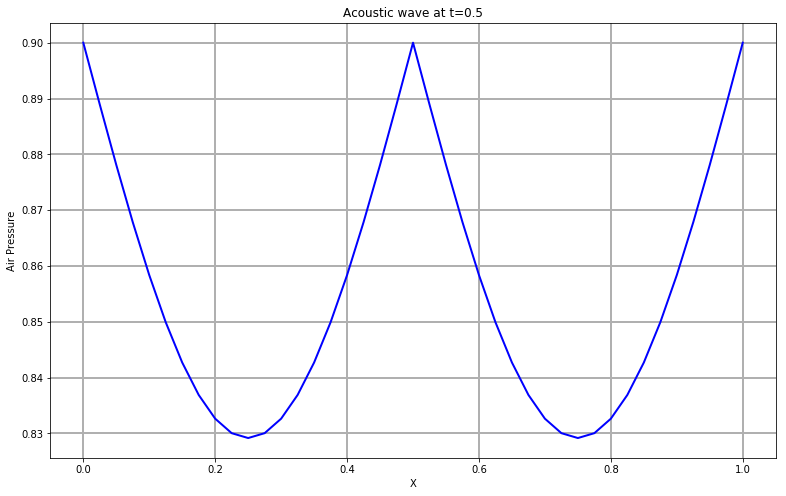

In [432]:
graph(p3,0.5,0.025,0.025)

In [433]:
for i in range(len(p)):
    for j in range(len(p[0])):
        p[i][j] = (4*p3[2*i][2*j]-p[i][j])/3

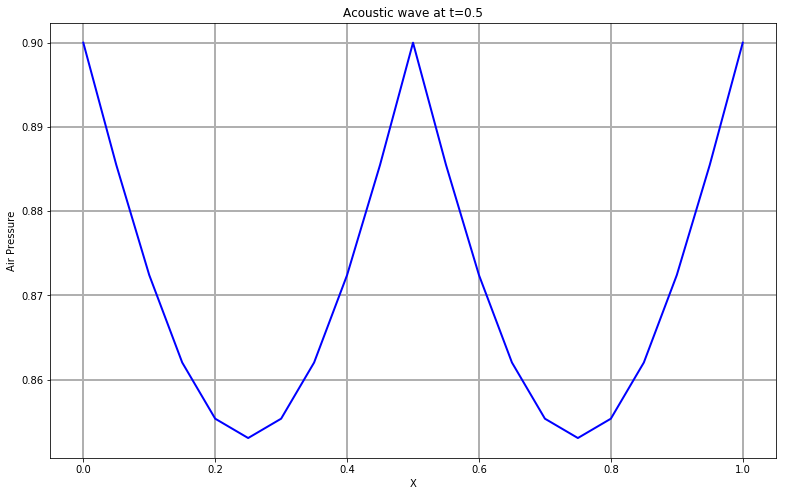

In [434]:
graph(p,0.5,0.05,0.05)

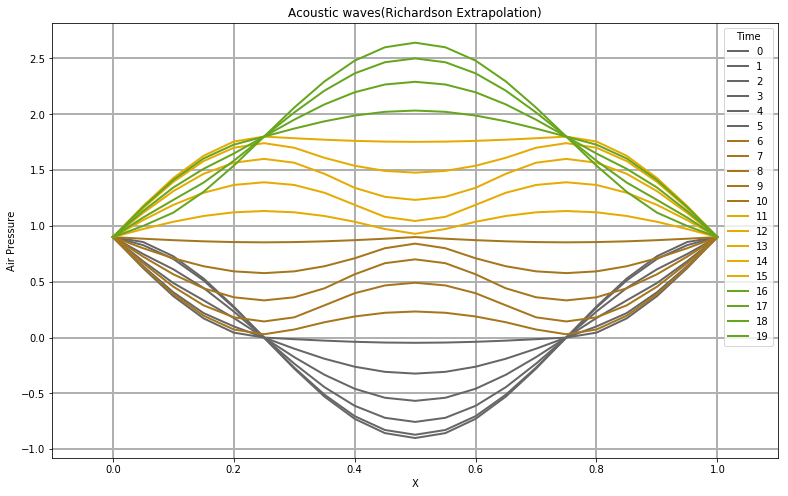

In [435]:
plt.figure(figsize=(13,8) , facecolor= 'w')
x = np.arange(0,1+0.05,0.05)
color=iter(cm.Dark2(np.linspace(1,0,len(p3))))
for i in range(0,20):
    c = next(color)
    plt.plot(x, p[i], color = c, linewidth = 2)
plt.grid(linewidth = 2)
plt.legend(labels = range(0,20), title = 'Time', loc=1)
plt.title('Acoustic waves(Richardson Extrapolation)')
plt.xlabel('X')
plt.ylabel('Air Pressure')
plt.xlim(-.1,1.1)
plt.show()

### Order of Richardson Extrapolation


Using the definition of the local truncation error:

$\tau_j^n(k,h) =  p(t_n,x_j) - p_j^m = O(h^2)+ O(k^2)$

Defining $p_2$ to have step size half of $p_1 $

$\tau_j^n(k,h) =  p(t_n,x_j) - p_j^m = \Sigma_{i=2}\; \; c_ik^i + d_ih^i$

$p_1(t_n,x_j) = P + \Sigma_{i=2}\; \; a_ik^i + b_ih^i$

$p_2(t_n,x_j) = P + \Sigma_{i=2}\; \; a_i(k/2)^i + b_i(h/2)^i$

Where $P$ is the exact solution at $p(t_n,x_j)$

Richardsons extarpolation:

$p = (4p_2-p_1)/3$

$p = 1/3(4(P + \Sigma_{i=2}\; \; a_i(k/2)^i + b_i(h/2)) - P - \Sigma_{i=2}\; \; a_ik^i + b_ih^i) =$

$(4P-P + \Sigma_{i=2}\; \; 4a_i(k/2)^i + 4b_i(h/2)h^i - \; \; a_ik^i - b_ih^i)/3 $

$p = P + \Sigma_{i=4}\; \; a_i'(k)^i + b_i'(h)h^i $

We can completly eliminate the $O(h^2)$ term, leaving us with
$\tau_j^n(k,h) =P-p = O(k^4)+O(h^4)$


This scheme is 4th order: $O(k^4), O(h^4)$